In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scan, simulate_data
import os
import time
import json
import pandas as pd

In [2]:
M,N,D,T = 1,30,31,1000
noise =  int(N*200*T/1000)
seed = 0
default_params = {
    'M':M,
    'N':N,
    'D':D,
    'T':T,
    'seed':seed,
    'noise':noise,
    'SM_repetitions':None,
    'spikes_in_SM':None
}

scan_dict = {
    'SM_repetitions':[2,3,4,5,6,7,8,9,10],
    'spikes_in_SM':[2,3,4,5,6,7,8,9,10]
}


In [3]:
N*20*T/1000

600.0

In [4]:
noise

6000

In [5]:
from itertools import product


In [6]:
# Generate all combinations of parameters
all_param_combinations = list(product(scan_dict['SM_repetitions'], scan_dict['spikes_in_SM']))

# Create a list of parameter dictionaries
param_combinations = []
for sm_rep, spikes_in_sm in all_param_combinations:
    params = default_params.copy()
    params['SM_repetitions'] = sm_rep
    params['spikes_in_SM'] = spikes_in_sm
    param_combinations.append(params)

In [7]:
date = 'Nov6th-1motif-gridsearch-60000'
filename = ''.join((date,'.json'))
filename

'Nov6th-1motif-gridsearch-60000.json'

In [27]:
num_samples = len(param_combinations)
trials = 5
results = []

# Iterate through parameter combinations
counter = 0
for idx, params in tqdm(enumerate(param_combinations)):
    for trial in range(trials):

        if os.path.isfile(filename):
            df = pd.read_json(filename)
            with open(filename, 'r') as results_file:
                results = json.load(results_file)
        # fixing a crash :(
        if counter <= len(results):
            print(counter)
        else:
            params['seed'] = (trial+1)*(idx+1)
            print(params)
            A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params)
            start = time.time()
            pattern_template, all_times, window_time, cluster_time, sequence_time,opt_cutoff = scan.scan_raster(A_sparse[1], A_sparse[0], window_dim=params['D'])
            if len(pattern_template) != 0:
                SM_acc, cc, _ = simulate_data.check_ground_truth(pattern_template, K_dense)
            else:
                SM_acc, cc = np.zeros(K_dense.shape[2]), []
            end = time.time()
            result = {
                'M':params['M'],
                'N':params['N'],
                'D':params['D'],
                'T':params['T'],
                'SM_repetitions':params['SM_repetitions'],
                'spikes_in_SM':params['spikes_in_SM'],
                'noise':params['noise'],
                'window_time': window_time,
                'cluster_time': cluster_time,
                'sequence_time': sequence_time,
                'total_time': end-start,
                'total_spikes':len(A_sparse[1]),
                'total_patterns':len(pattern_template),
                'SM_acc':SM_acc.tolist()
            }

            results.append(result)

            with open(filename, 'w') as results_file:
                json.dump(results, results_file, indent=4)
        counter+=1


3it [00:00, 24.68it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


9it [00:00, 26.21it/s]

27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


15it [00:00, 26.80it/s]

54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


21it [00:00, 27.02it/s]

82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


27it [00:01, 27.05it/s]

110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137


33it [00:01, 26.97it/s]

138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


36it [00:01, 26.96it/s]

166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193


42it [00:01, 27.09it/s]

194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222


48it [00:01, 27.22it/s]

223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


51it [00:01, 26.80it/s]

250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265


57it [00:02, 19.08it/s]

266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292


63it [00:02, 22.19it/s]

293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


69it [00:02, 24.24it/s]

320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346


72it [00:02, 24.95it/s]

347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373


75it [00:03, 25.25it/s]

374
375
376
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 228, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 5}
6040 Windows


75it [00:18, 25.25it/s]

1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.37 | most_detections - 2etections - 2
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 304, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 5}
6037 Windows
28 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 380, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 5}
6045 Windows
21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


76it [01:33, 11.34s/it]

{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 77, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 6}
6047 Windows


2 patterns found...s... 50% 10.01 | opt_cutoff - 1.37 | most_detections - 2etections - 2
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 154, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 6}
6051 Windows
15 patterns found...... 93% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 231, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 6}
6052 Windows
21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 308, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 6}
6055 Windows
28 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 385, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 6}
6046 Windows
18 patterns found...... 94% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


77it [04:02, 32.20s/it]

{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 78, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 7}
6056 Windows


20 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 156, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 7}
6051 Windows
20 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 234, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 7}
6048 Windows
1 patterns found...s... 0%- 10.01 | opt_cutoff - 1.37 | most_detections - 2etections - 2
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 312, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 7}
6055 Windows
10 patterns found...... 90% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 390, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 7}
6053 Windows
24 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


78it [06:33, 53.35s/it]

{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 79, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 8}
6068 Windows


21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 158, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 8}
6063 Windows
17 patterns found...... 94% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 237, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 8}
6072 Windows
19 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 316, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 8}
6059 Windows
24 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 395, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 8}
6065 Windows
21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


79it [09:05, 73.37s/it]

{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 80, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 9}
6074 Windows


27 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 160, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 9}
6081 Windows
19 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 240, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 9}
6073 Windows
23 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 320, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 9}
6069 Windows
27 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 400, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 9}
6076 Windows
24 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1


80it [11:40, 91.63s/it]

{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 81, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 10}
6068 Windows
16 patterns found...... 94% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 162, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 10}
6079 Windows
27 patterns found...... 96% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 243, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 10}
6080 Windows
21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 324, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 10}
6082 Windows
21 patterns found...... 95% 10.01 | opt_cutoff - 1.09 | most_detections - 1etections - 1
{'M': 1, 'N': 30, 'D': 31, 'T': 1000, 'seed': 405, 'noise': 6000, 'SM_repetitions': 10, 'spikes_in_SM': 10}
6075 Windows
24 patterns found...... 96% 10.01 | opt_

81it [14:14, 10.55s/it] 


In [20]:
testidc = 50
for i in range(55):
    if i<=testidc:
        pass
    else:
        print(i)
        testidc=i

51
52
53
54


In [19]:
len([])

0

In [22]:
len(test)

376

In [21]:
with open(filename, 'r') as results_file:
    test = json.load(results_file)

In [14]:
results[-1]

{'M': 1,
 'N': 30,
 'D': 31,
 'T': 1000,
 'SM_repetitions': 10,
 'spikes_in_SM': 5,
 'noise': 6000,
 'window_time': 21.401371955871582,
 'cluster_time': 8.296303987503052,
 'sequence_time': 0.6005117893218994,
 'total_time': 30.475545167922974,
 'total_spikes': 6050,
 'total_patterns': 13,
 'SM_acc': [0.049019607843137254]}

In [51]:
len(results), 81*5

(405, 405)

In [52]:
df = pd.DataFrame(results)
df['SM_acc'] = df['SM_acc'].apply(lambda x: x[0])

In [54]:
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,30,31,10000,2,2,6000,3.353568,15.733915,0.988956,20.693697,6004,478,0.250000
1,1,30,31,10000,2,2,6000,3.178797,14.196491,0.898568,18.877908,6004,470,0.333333
2,1,30,31,10000,2,2,6000,3.491379,14.626210,0.956625,19.697013,6004,490,0.333333
3,1,30,31,10000,2,2,6000,3.135842,14.765262,0.927104,19.526605,6004,480,0.333333
4,1,30,31,10000,2,2,6000,3.402931,15.329992,0.839977,20.227450,6004,481,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,30,31,10000,10,10,6000,6.455900,30.244042,1.912407,39.844586,6100,498,1.000000
401,1,30,31,10000,10,10,6000,6.416373,28.987181,1.941970,38.565872,6100,493,1.000000
402,1,30,31,10000,10,10,6000,6.453078,28.731188,1.872453,38.236771,6100,478,1.000000
403,1,30,31,10000,10,10,6000,6.428005,29.314606,1.943147,38.892869,6100,482,1.000000


In [81]:
grouped = df.groupby(['SM_repetitions', 'spikes_in_SM', 'noise'])


In [82]:
debug = grouped['SM_acc'].mean().to_numpy().reshape(9,9)

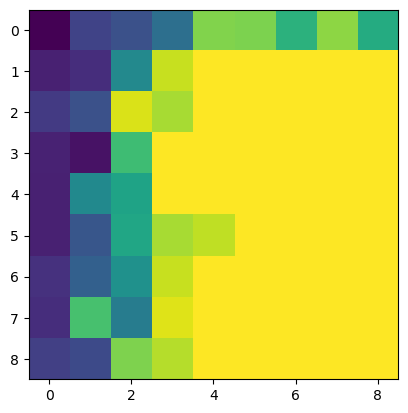

In [83]:
plt.figure()
plt.imshow(debug)


In [85]:
dfx = pd.read_json('Nov6th-1motif-gridsearch-600.json')
dfx['SM_acc'] = dfx['SM_acc'].apply(lambda x: x[0])

In [86]:
groupedx = dfx.groupby(['SM_repetitions', 'spikes_in_SM', 'noise'])
debugx = groupedx['SM_acc'].mean().to_numpy().reshape(9,9)

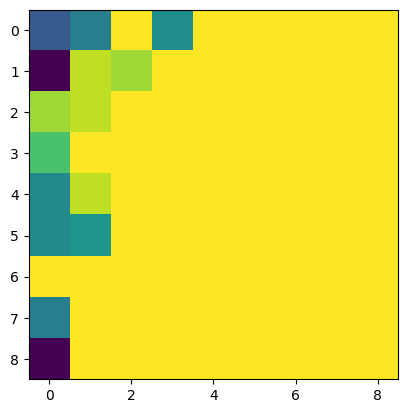

In [87]:
plt.figure()
plt.imshow(debugx)


In [73]:
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,30,31,10000,2,2,6000,3.353568,15.733915,0.988956,20.693697,6004,478,0.250000
1,1,30,31,10000,2,2,6000,3.178797,14.196491,0.898568,18.877908,6004,470,0.333333
2,1,30,31,10000,2,2,6000,3.491379,14.626210,0.956625,19.697013,6004,490,0.333333
3,1,30,31,10000,2,2,6000,3.135842,14.765262,0.927104,19.526605,6004,480,0.333333
4,1,30,31,10000,2,2,6000,3.402931,15.329992,0.839977,20.227450,6004,481,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,30,31,10000,10,10,6000,6.455900,30.244042,1.912407,39.844586,6100,498,1.000000
401,1,30,31,10000,10,10,6000,6.416373,28.987181,1.941970,38.565872,6100,493,1.000000
402,1,30,31,10000,10,10,6000,6.453078,28.731188,1.872453,38.236771,6100,478,1.000000
403,1,30,31,10000,10,10,6000,6.428005,29.314606,1.943147,38.892869,6100,482,1.000000


In [74]:
dfx

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,30,31,10000,2,2,600,0.040899,1.053426,0.004999,1.116918,604,13,[1.0]
1,1,30,31,10000,2,2,600,0.040091,1.044930,0.000000,1.094879,604,6,[1.0]
2,1,30,31,10000,2,2,600,0.041010,1.076639,0.000000,1.119895,604,1,[0.0]
3,1,30,31,10000,2,2,600,0.035108,1.110748,0.001993,1.154830,604,6,[0.5]
4,1,30,31,10000,2,2,600,0.042174,1.095487,0.006869,1.160186,604,13,[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,30,31,10000,10,10,600,0.050164,1.082692,0.011224,1.149058,700,5,[1.0]
401,1,30,31,10000,10,10,600,0.047838,1.019996,0.005050,1.079398,700,4,[1.0]
402,1,30,31,10000,10,10,600,0.049996,1.284047,0.005138,1.339181,700,3,[1.0]
403,1,30,31,10000,10,10,600,0.051888,1.117757,0.005042,1.181024,700,3,[1.0]


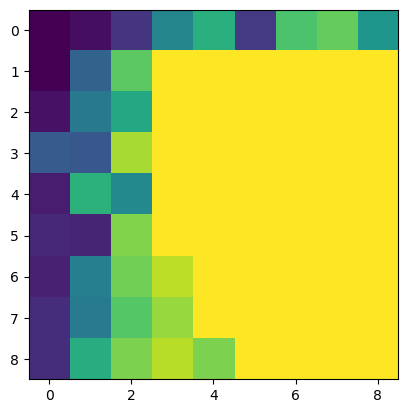

In [101]:
df = pd.read_json('Nov6th-1motif-gridsearch-60.json')
df['SM_acc'] = df['SM_acc'].apply(lambda x: x[0])
grouped = df.groupby(['SM_repetitions', 'spikes_in_SM', 'noise'])
debug = grouped['SM_acc'].mean().to_numpy().reshape(9,9)
plt.figure()
plt.imshow(debug)


In [104]:
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,30,31,1000,2,2,600,0.167907,2.014789,0.061705,2.298254,604,17,0.200000
1,1,30,31,1000,2,2,600,0.138659,2.011248,0.054423,2.244272,604,16,0.250000
2,1,30,31,1000,2,2,600,0.145620,1.989142,0.046106,2.241982,604,19,0.333333
3,1,30,31,1000,2,2,600,0.172480,2.010783,0.035032,2.252838,604,13,0.200000
4,1,30,31,1000,2,2,600,0.153755,1.897519,0.039381,2.123940,604,12,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,30,31,1000,10,10,600,0.150689,1.378262,0.063499,1.612966,699,12,1.000000
401,1,30,31,1000,10,10,600,0.152447,1.442873,0.081611,1.709640,700,13,1.000000
402,1,30,31,1000,10,10,600,0.125751,1.440105,0.099461,1.685572,699,8,1.000000
403,1,30,31,1000,10,10,600,0.134488,1.421776,0.082399,1.658916,700,10,1.000000
